In [8]:
require(nnet)

rm(list=ls())
#filled_path <- "C:/Users/teipolykom/git/fmvcd/krest/"
filled_path <- "/home/larisa/Dropbox/git/fmvcd/krest/"

setwd(filled_path); getwd()
# load data
cli_dataset <-read.table("1969.cli", header=FALSE, sep="")
names(cli_dataset) <- c("day", "month", "year", "prec", "temp");
cli_dataset[cli_dataset$prec == -9999, 4] <- NA
print(summary(cli_dataset[, c(4)]))

prec_vector <- cli_dataset[, 4]

train_src <- data.frame(time= (1: length(prec_vector)), prec=prec_vector)
train <- data.frame(time= (1: length(prec_vector))/370., prec=prec_vector/350.)

# plot(train, col = "red")

nnet.fit <- nnet(prec~ ., data=train, size=11, na.action = "na.omit",
                 linout=TRUE, skip=TRUE, MaxNWts=10000, trace=FALSE, maxit=500,
                 abstol = 1.0e-4, reltol = 1.0e-8)
# summarize the fit
# print(summary(nnet.fit))
# make predictions
x <- data.frame(time=train[, 1])
predictions <- predict(nnet.fit, x, type="raw")

# summarize accuracy
y <- train[, 2]
mse <- mean((y - predictions)^2, na.rm = T)
cat("MSE = ", mse, "\n")

[1] "/home/larisa/Dropbox/git/fmvcd/krest"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   5.402   2.000 131.000      19 
MSE =  0.001678685 


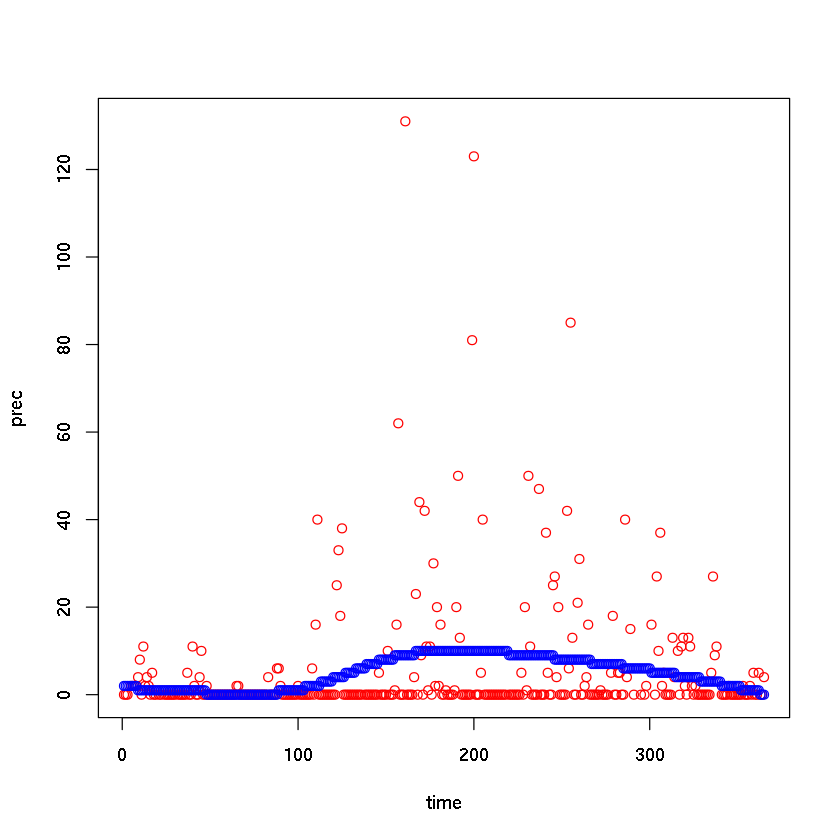

In [9]:
norm_predict <- function(x){
  if(x < 0) return(0)
  else return(as.integer(x*350.))
}
pred_src<-data.frame(prec_predict = sapply(predictions[, 1], norm_predict))

plot.new()
plot(train_src, col = "red")
res_src <- data.frame(time=train_src[, 1], prec=pred_src[, 1])
points(res_src, col="blue")